## Dataloaders

Primarily for memory intensive datasets.

In [2]:
from torch.utils.data import DataLoader

# DataLoader(
#     dataset,            
#     batch_size=1,       # no. of training samples used in one iteration
#     shuffle=False,      # shuffle samples or not
#     num_workers=0,      # main process does the data loading when 0
#     collate_fn=None,    # merge datasets
#     pin_memory=False,
#  )

In [ ]:
# Import MNIST
from torchvision.datasets import MNIST

# Download and Save MNIST 
data_train = MNIST('~/mnist_data', train=True, download=True)

# Print Data
print(data_train)
print(data_train[12])

5


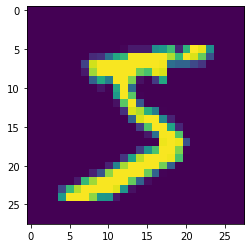

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data_train[0][0])
print(data_train[0][1])


In [ ]:
import torch
from torchvision import transforms

data_train = torch.utils.data.DataLoader(
    MNIST(
          '~/mnist_data', train=True, download=True, 
          transform = transforms.Compose([
              transforms.ToTensor()
          ])),
          batch_size=64,
          shuffle=True
          )

for batch_idx, samples in enumerate(data_train):
      print(batch_idx, ' | ', samples)
      break

In [27]:
# transforms - transforming input data into the desired format / required input size

## Dataloaders with EEG

In [5]:
tuhab_sample_path = "/home/maligan/Documents/VU/Year_2/M.Sc._Thesis_[X_400285]/my_thesis/code/braindecode_ssl_thesis/data/isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/eval/abnormal/01_tcp_ar/007/00000768/s003_2012_04_06/00000768_s003_t000.edf"
sample = mne.io.read_raw_edf(tuhab_sample_path, preload=True, stim_channel='auto')

Extracting EDF parameters from /home/maligan/Documents/VU/Year_2/M.Sc._Thesis_[X_400285]/my_thesis/code/braindecode_ssl_thesis/data/isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/eval/abnormal/01_tcp_ar/007/00000768/s003_2012_04_06/00000768_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 304249  =      0.000 ...  1216.996 secs...


Fitting ICA to data using 30 channels (please be patient, this may take a while)


<ipython-input-14-009ad3f45203>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(sample)


Selecting by non-zero PCA components: 26 components
Fitting ICA took 30.5s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

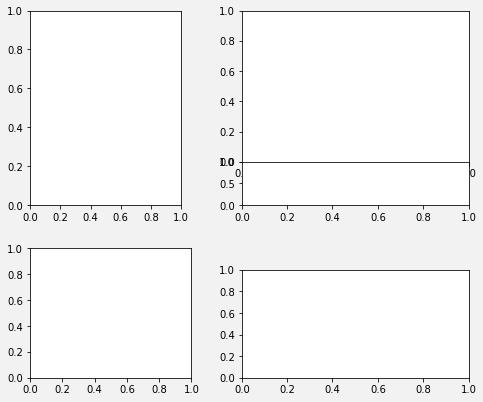

In [14]:
ica = mne.preprocessing.ICA(random_state=97, max_iter=800)
ica.fit(sample)

ica.plot_properties(sample)

In [3]:
from braindecode.datasets import (create_from_mne_raw, create_from_mne_epochs)

samples = create_from_mne_raw(
    sample,
    trial_start_offset_samples=0,
    trial_stop_offset_samples=0,
    window_size_samples=500,
    window_stride_samples=500,
    drop_last_window=True,
    # descriptions=descriptions,
)

ValueError: All picks must be < n_channels (30), got 30